In [87]:
# TODO: First test all code methods using one dimensional dimensions first
    # A simple recommended test is to set the feature matrix equal to identity matrix - then the model should give MSE = 0
    # Then test with the Franke fcn mentioned in the notes



# Part a: Ordinary Least Squares on the Franke function
## Create a data set, scale the data (e.g. subtracting mean values) and split into training and test sets

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [104]:
#Classes
class DataHandler:
    
    def __init__(self, x, y):
        self._x = x
        self._y = y
        self._featureMatrix = 0
        self._beta = 0
        self._X_train = 0
        self._X_test = 0
        self._y_train = 0
        self._y_test = 0
        self._y_tilde = 0
        self._y_predict = 0

    #TODO: Should really ensure feature matrix has actually been created by this point
    def Get_beta(self):
        return self._beta
    
    def Get_predictions(self):
        return self._X_train, self._X_test, self._y_tilde, self._y_predict
        
    def CreateFeatureMatrix(self, degree):
        poly = PolynomialFeatures(degree, include_bias=True)
        poly_features = poly.fit_transform(self._x.reshape(-1, 1))
        poly.fit(poly_features, self._y)

        self._featureMatrix = poly_features

        return poly_features
    
    def OrdinaryLeastSquaresMSE(self):
        X_train, X_test, y_train, y_test = train_test_split(self._featureMatrix, self._y, test_size=0.2)

        beta = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train) #Pseudo inverse to handle singular matrices
        self._beta = beta

        #Make the prediction
        ytilde = X_train @ beta
        ypredict = X_test @ beta

        self._X_train = X_train
        self._X_test = X_test
        self._y_tilde = ytilde
        self._y_predict = ypredict
        self._y_train = y_train
        self._y_test = y_test

        mse_training = error.mean_squared_error(y_train, ytilde)
        mse_test = error.mean_squared_error(y_test, ypredict)

        return (mse_training, mse_test)
    
    def R2ScoreFunction(self):
        r2_training = error.r2_score(self._y_train, self._y_tilde)
        r2_test = error.r2_score(self._y_test, self._y_predict)

        return r2_training, r2_test
    
    def Create_test_plot(self, degree):
        test_feature = self._featureMatrix
        test_beta = self._beta

        y_fit = test_feature @ test_beta

        # Plot
        plt.plot(self._x, self._y, 'bo', label = 'Data Points')
        plt.plot(self._x, y_fit, 'r-', label = f'Fitted Line (Degree {degree})')

        plt.title('Original Data with Fitted Line')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.grid(True)
        plt.show()
        
    
    def OLS_MSE_works_as_expected(self):
        X_identity = np.identity(100)
        actual_feature_matrix = self._featureMatrix 
        self._featureMatrix = X_identity
        
        ols_training_mse, ols_test_mse = self.OrdinaryLeastSquaresMSE()

        self._featureMatrix = actual_feature_matrix
        
        if ols_training_mse == 0:
            return True
        else:
            raise Exception("MSE on training data is not zero. Most likely some error in calculation logic. ols_training_mse value: ", ols_training_mse)


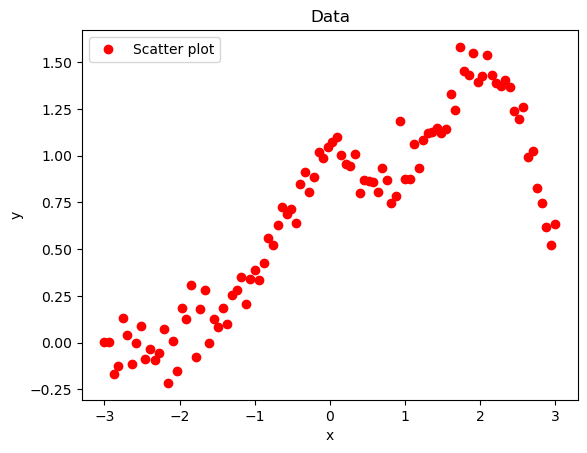

In [105]:
# Make data set
np.random.seed()
n = 100

x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

Simple_test_data = DataHandler(x, y)

##Plot the scatter
plt.figure()
plt.title("Data")
plt.plot(x, y, 'ro', label = 'Scatter plot')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



In [91]:
#Functions
# def CreateFeatureMatrix(degree):
#     data_points = np.column_stack((x, y))
#     poly = PolynomialFeatures(degree, include_bias=False)

#     poly_features = poly.fit_transform(data_points)

#     return poly_features

# def OrdinaryLeastSquaresMSE(featureMatrix):
#     X_train, X_test, y_train, y_test = train_test_split(featureMatrix, y, test_size=0.2)

#     beta = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train) #Pseudo inverse to handle singular matrices
#     # and then make the prediction
#     ytilde = X_train @ beta
#     ypredict = X_test @ beta

#     mse_training = error.mean_squared_error(y_train, ytilde)
#     mse_test = error.mean_squared_error(y_test, ypredict)

#     return (mse_training, mse_test, beta)

# def OLS_MSE_as_expected():
#     X_identity = np.identity(100)
#     ols_training_mse, ols_test_mse, beta = OrdinaryLeastSquaresMSE(X_identity)

#     if ols_training_mse == 0:
#         return True
#     else:
#         return False

## Present a critical discussion of how/why you have scaled the data
Assumption: Subtracting the mean value centres the data around zero - large/small values won't be as affected by the different regression models. For a larger deviation from zero, it might have been necessary to scale values down, but here the y-values are all within +-1 so that won't be necessary.

## Perform ordinary least squares analysis using polynomials x and y up to fifth order

## Evaluate MSE and R2

### Plot the MSE and R2 values as functions of degree - plot also the params beta as you increase the order

y_max:  1.5825255618731855
y_min:  -0.21617454767744823
y_mean:  0.6864570826712645
y_scaled_max:  0.896068479201921
y_scaled_min:  -0.9026316303487127
y_scaled_mean:  5.329070518200751e-17
Degrees:  1
OLS training MSE:  0.06948086706254218
OLS test MSE:  0.0399545572943024


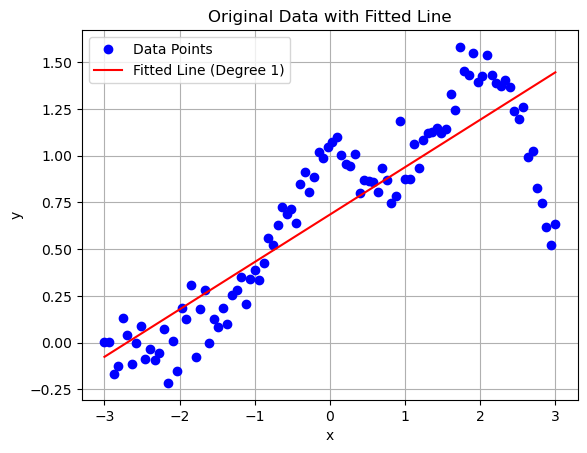

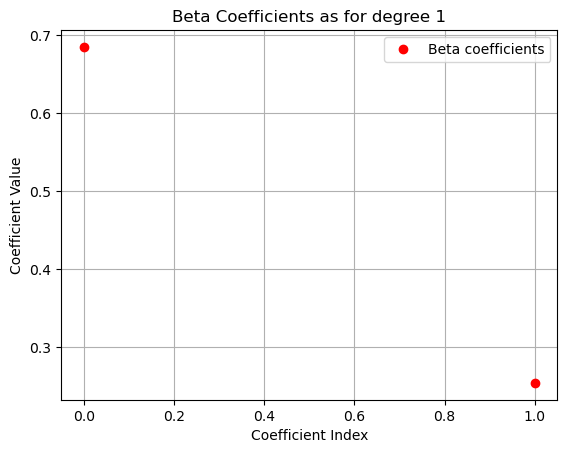

Degrees:  2
OLS training MSE:  0.044889416159355065
OLS test MSE:  0.08339711805544435


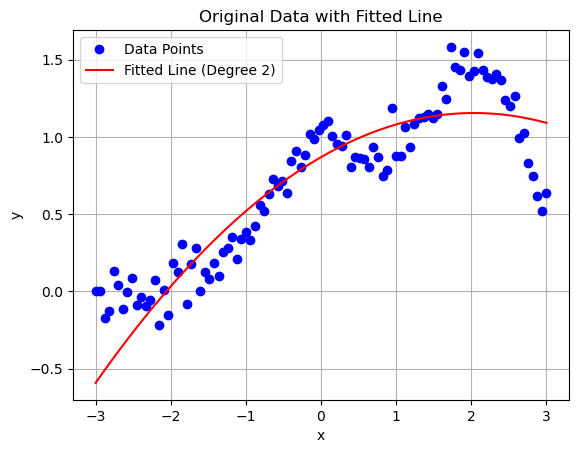

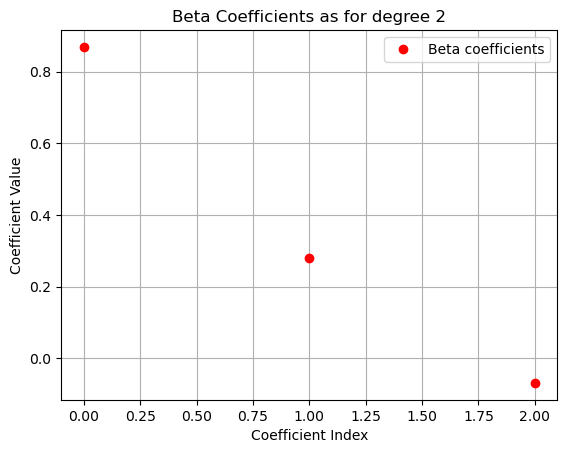

Degrees:  3
OLS training MSE:  0.026742333697830793
OLS test MSE:  0.03608416784831189


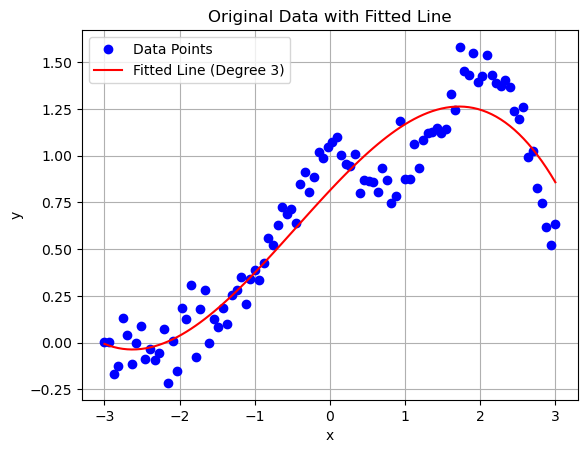

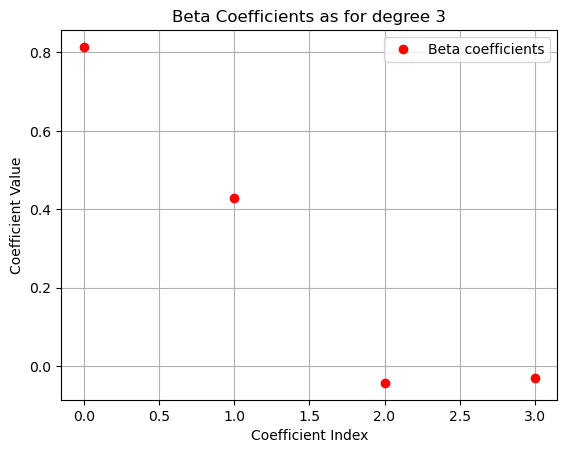

Degrees:  4
OLS training MSE:  0.02579731327535212
OLS test MSE:  0.034413052800402834


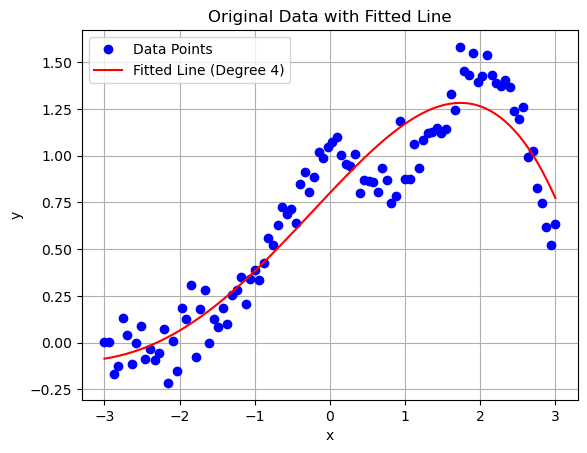

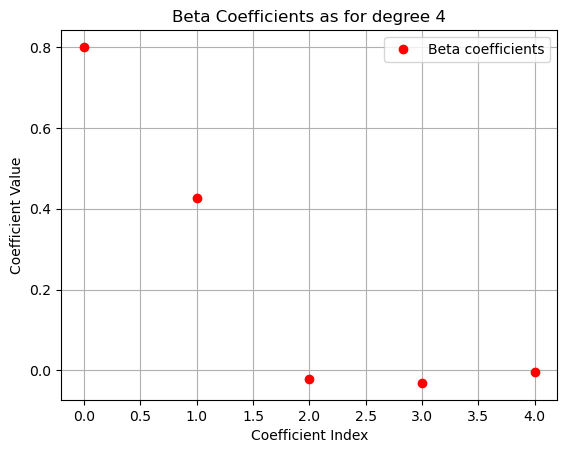

Degrees:  5
OLS training MSE:  0.0171520872125777
OLS test MSE:  0.029029672897965673


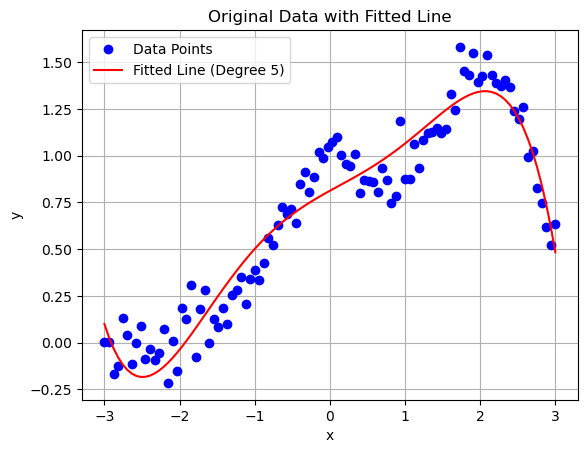

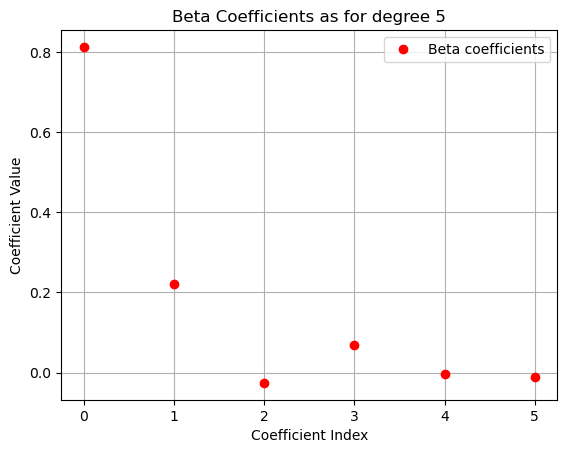

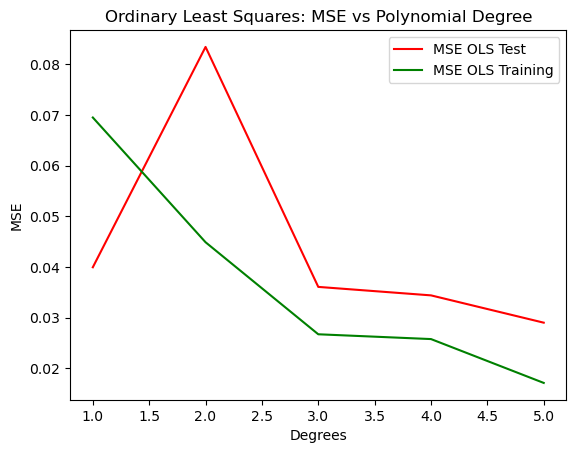

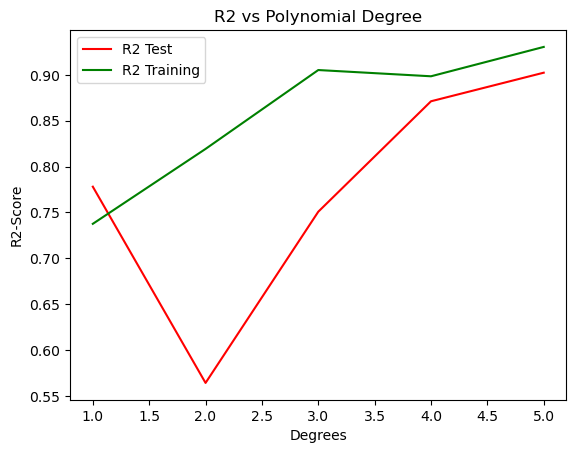

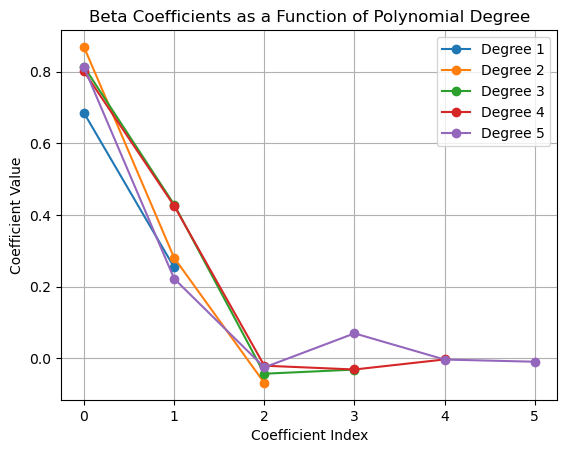

In [108]:
# Scale the data:

#First take a superficial look at the values:
print("y_max: ", y.max())
print("y_min: ", y.min())
y_mean = y.mean()
print("y_mean: ", y.mean())

#Subtract the mean value
y_list = []
for value in y:
    y_list.append(value - y_mean)

y_scaled = np.array(y_list)

print("y_scaled_max: ", y_scaled.max())
print("y_scaled_min: ", y_scaled.min())
print("y_scaled_mean: ", y_scaled.mean())

#Before progressing: Test that code behaves as expected
Simple_test_data.OLS_MSE_works_as_expected()

#Calculate mse and r2 for degrees 1-5
ols_training_mses = []
ols_test_mses = []

betas = []

training_r2s = []
test_r2s = []

degrees = range(1,6)
for order in degrees:
    Simple_test_data.CreateFeatureMatrix(order)
    
    ols_training_mse, ols_test_mse = Simple_test_data.OrdinaryLeastSquaresMSE()
    r2_training, r2_test = Simple_test_data.R2ScoreFunction()
    
    ols_training_mses.append(ols_training_mse)
    ols_test_mses.append(ols_test_mse)

    beta = Simple_test_data.Get_beta()
    betas.append(beta)

    training_r2s.append(r2_training)
    test_r2s.append(r2_test)

    X_train, X_test, y_tilde, y_predict = Simple_test_data.Get_predictions()

    print("Degrees: ", order)
    print("OLS training MSE: ", ols_training_mse)
    print("OLS test MSE: ", ols_test_mse)

    #For testing - plotting the fitted line over the data points:
    Simple_test_data.Create_test_plot(order)

    #TODO: Look at code from chatGPT after the for loop: Better to include everything in one plot?
    # Adding plot details   
    # plt.figure()
    # plt.plot(beta, 'ro', label = 'Beta coefficients')
    # plt.title(f'Beta Coefficients for degree {order}')
    # plt.xlabel('Coefficient Index')
    # plt.ylabel('Coefficient Value')
    # plt.legend()
    # plt.grid(True)
    # plt.show()

#TODO: Make labels and title better
#Plot the mse vs. degrees
plt.figure()
plt.title("Ordinary Least Squares: MSE vs Polynomial Degree")
plt.plot(degrees, ols_test_mses, 'r', label = 'MSE OLS Test')
plt.plot(degrees, ols_training_mses, 'g', label = 'MSE OLS Training')

plt.xlabel('Degrees')
plt.ylabel('MSE')
plt.legend()
plt.show()

#Plot the r2 scores vs. degrees
plt.figure()
plt.title("R2 vs Polynomial Degree")
plt.plot(degrees, test_r2s, 'r', label = 'R2 Test')
plt.plot(degrees, training_r2s, 'g', label = 'R2 Training')

plt.xlabel('Degrees')
plt.ylabel('R2-Score')
plt.legend()
plt.show()

#From ChatGPT:
#Plot beta vs degrees
for i in range(len(betas)):
    plt.plot(betas[i], marker='o', label=f'Degree {degrees[i]}')

# Adding plot details
plt.title('Beta Coefficients as a Function of Polynomial Degree')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)
plt.show()



### Comment on the above results
For ols beta values, it seems only the first order has a value of 1, after this all values are zero.
The mse value for 1 degree is also the lowest, so makes sense?

# Part b: Adding Ridge Regression to the Franke function

# Part c: Adding Lasso to the Franke function

# Part d: Pen and paper part
## Variance and expectation value stuff

# Part e: Bias-variance trade-off and resampling techniques


# Part f: Cross-validation as resampling techniques, adding more complexity

# Part g: Analysis of real data
## Repeat a-f with real data

## Present a critical discussion of the results, discussing the applicability of these regression methods to the type of data used here

## Include link to github repo? With a folder for results/plots?